In [1]:
from ThesisFunctions import *

-2*b**9*(-b**9*x0 + 4501/50) - 2*b**7*(-b**7*x0 + 331/10) - 2*b**5*(-b**5*x0 + 609/50) - 2*b**4*(-b**4*x0 + 739/100) - 2*b*(-b*x0 + 163/100) + 2*x0 - 2 -18*b**8*x0*(-b**9*x0 + 4501/50) - 14*b**6*x0*(-b**7*x0 + 331/10) - 10*b**4*x0*(-b**5*x0 + 609/50) - 8*b**3*x0*(-b**4*x0 + 739/100) - 2*x0*(-b*x0 + 163/100)
1
-2*b**9*(-b**9*x0 + 9001/100) - 2*b**6*(-b**6*x0 + 502/25) - 2*b**4*(-b**4*x0 + 739/100) - 2*b**2*(-b**2*x0 + 68/25) - 2*b*(-b*x0 + 41/25) + 2*x0 - 101/50 -18*b**8*x0*(-b**9*x0 + 9001/100) - 12*b**5*x0*(-b**6*x0 + 502/25) - 8*b**3*x0*(-b**4*x0 + 739/100) - 4*b*x0*(-b**2*x0 + 68/25) - 2*x0*(-b*x0 + 41/25)
1
-2*b**9*(-b**9*x0 + 4501/50) - 2*b**5*(-b**5*x0 + 1217/100) - 2*b**4*(-b**4*x0 + 739/100) - 2*b**3*(-b**3*x0 + 112/25) - 2*b*(-b*x0 + 41/25) + 2*x0 - 49/25 -18*b**8*x0*(-b**9*x0 + 4501/50) - 10*b**4*x0*(-b**5*x0 + 1217/100) - 8*b**3*x0*(-b**4*x0 + 739/100) - 6*b**2*x0*(-b**3*x0 + 112/25) - 2*x0*(-b*x0 + 41/25)
1
-2*b**9*(-b**9*x0 + 90) - 2*b**8*(-b**8*x0 + 273/5) - 2*b**4*(-b**4

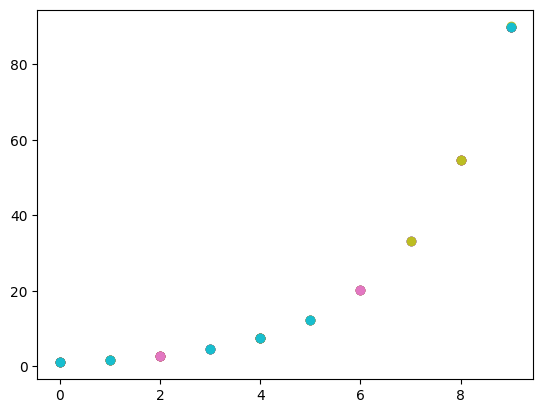

In [4]:
noise_level = 0.01
num_datapoints_original = 8
alpha = 0.5
initial_cond = 1

# Initialize a list to store the results
results_list = []

# Number of data points to remove
num_remove = 3

# New number of data points after removal
num_datapoints_reduced = num_datapoints_original - num_remove

trials_minimas = []  # Store the number of minima found in each trial for current num_datapoints

for _ in range(10):  # Perform 10 trials to average out the effects of randomness.
    
    # Generae data with specified number of datapoints and noise level.
    t_i = np.sort(np.random.choice(range(0, 10), size=6, replace=False))

    x_i = model(t_i, initial_cond, alpha)
    noise = np.random.normal(0, noise_level, x_i.shape)
    x_noisy = x_i + noise
    x_rational = np.array([min(sp.Rational(int(xn * 100), 100), 10000) for xn in x_noisy])

    x_i = x_rational
    
    plt.scatter(t_i, x_i)
  
    data = pd.DataFrame({'Time': t_i, 'Data': x_i})
    
    # Calculate the Groebner basis.
    B = groeb(x_i, t_i)
    
                     
    # Find positive real roots.
    positive_roots_b= roots_symbolic(B[1])

    params = find_x0_alpha_pairs(B, positive_roots_b)
    # # Evaluate the Hessian to check for minima.
    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
        
    # # Count the number of minima.
    num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
    
    if num_minimas == 0:
        print("Testing out newton method")
        positive_roots_b = find_roots_alternative(B[1])
        params = find_x0_alpha_pairs(B, positive_roots_b)
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
        num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
        if num_minimas == 0: 
            print("No minima found, performing grid search.")
            for param in params:
                best_params, is_edge = grid_search_around_extrema(param, data)
                best_params2, is_edge2 = grid_search_around_extrema((0,0), data)
                if not is_edge or not is_edge2:
                    #print(f"Found a minimum inside the grid at {best_params}.")
                    num_minimas = 1
                else:
                    pass
                    print(f"Minimum found at the edge for {param}, likely no minimum exists.")
                    # Handle the edge case, possibly by ignoring or taking special note
                    #plot(data)
    print(num_minimas)
    trials_minimas.append(num_minimas)


# Calculate statistics for the trials
max_minimas = np.max(trials_minimas)
mean_minimas = np.mean(trials_minimas)
std_minimas = np.std(trials_minimas)
results_list.append((num_datapoints_reduced, mean_minimas, std_minimas, max_minimas))

# Display results
print(f'Number of Datapoints={num_datapoints_reduced}: Mean= {mean_minimas}, Std Dev = {std_minimas}, Max = {max_minimas}')



1
1
1
1
1
1
1
1
1
1
Number of Datapoints=5: Mean= 1.0, Std Dev = 0.0, Max = 1


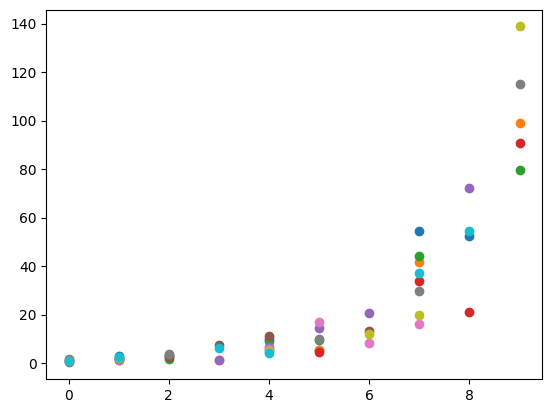

In [11]:
#Removing datapoints with a little more noise

noise_level = 4
num_datapoints_original = 8
alpha = 0.5
initial_cond = 1

# Initialize a list to store the results
results_list = []

# Number of data points to remove
num_remove = 3

# New number of data points after removal
num_datapoints_reduced = num_datapoints_original - num_remove

trials_minimas = []  # Store the number of minima found in each trial for current num_datapoints

for _ in range(10):  # Perform 10 trials to average out the effects of randomness.
    
    # Generae data with specified number of datapoints and noise level.
    t_i = np.sort(np.random.choice(range(0, 10), size=6, replace=False))

    x_i = model(t_i, initial_cond, alpha)
    noise = noise_level * x_i *  np.random.normal(0, 1, size=t_i.shape) * 0.1
    x_noisy = x_i + noise
    x_rational = np.array([min(sp.Rational(int(xn * 100), 100), 10000) for xn in x_noisy])

    x_i = x_rational
    
    plt.scatter(t_i, x_i)
  
    data = pd.DataFrame({'Time': t_i, 'Data': x_i})
    
    # Calculate the Groebner basis.
    B = groeb(x_i, t_i)
    
                     
    # Find positive real roots.
    positive_roots_b= roots_symbolic(B[1])

    params = find_x0_alpha_pairs(B, positive_roots_b)
    # # Evaluate the Hessian to check for minima.
    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
        
    # # Count the number of minima.
    num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
    
    if num_minimas == 0:
        print("Testing out newton method")
        positive_roots_b = find_roots_alternative(B[1])
        params = find_x0_alpha_pairs(B, positive_roots_b)
        maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
        num_minimas = sum(1 for _, is_true in maxima_checks if is_true)
        if num_minimas == 0: 
            print("No minima found, performing grid search.")
            for param in params:
                best_params, is_edge = grid_search_around_extrema(param, data)
                best_params2, is_edge2 = grid_search_around_extrema((0,0), data)
                if not is_edge or not is_edge2:
                    #print(f"Found a minimum inside the grid at {best_params}.")
                    num_minimas = 1
                else:
                    pass
                    print(f"Minimum found at the edge for {param}, likely no minimum exists.")
                    # Handle the edge case, possibly by ignoring or taking special note
                    #plot(data)
    print(num_minimas)
    trials_minimas.append(num_minimas)


# Calculate statistics for the trials
max_minimas = np.max(trials_minimas)
mean_minimas = np.mean(trials_minimas)
std_minimas = np.std(trials_minimas)
results_list.append((num_datapoints_reduced, mean_minimas, std_minimas, max_minimas))

# Display results
print(f'Number of Datapoints={num_datapoints_reduced}: Mean= {mean_minimas}, Std Dev = {std_minimas}, Max = {max_minimas}')

